**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


LOADING DATASET AND VIEWING THE FIRST 5 ROWS

In [3]:
day = pd.read_csv('C:\\Users\\hlala\\Downloads\\das223 (1)\\das223\\Regression\\day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


CLEANING PROCESS

In [4]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

VIEWING THE SHAPE OF THE DATASET

In [5]:
day.shape

(730, 16)

FEATURE SELECTIONS FOR THE MODEL

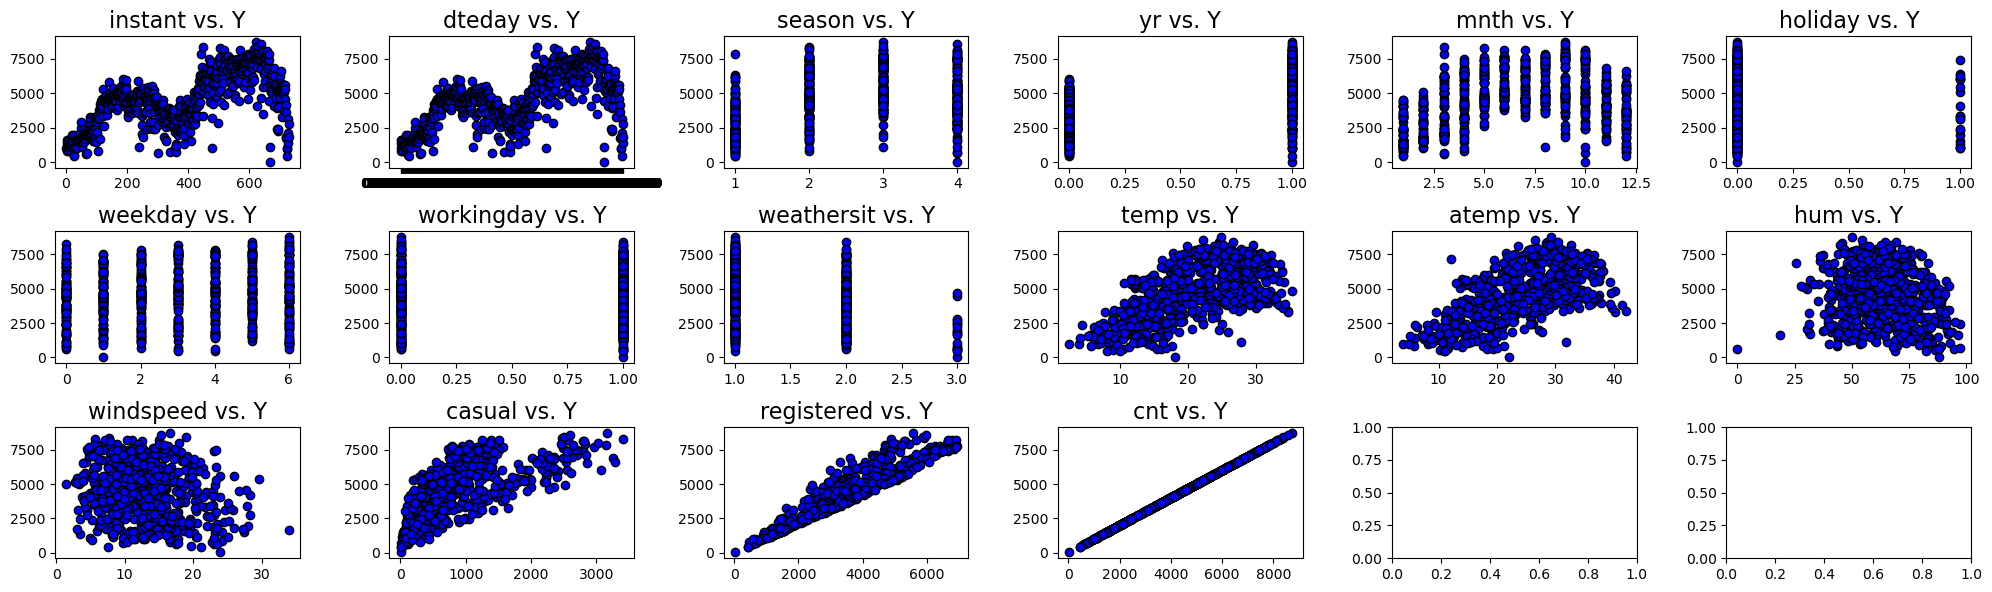

In [6]:
fig, axs = plt.subplots(3,6, figsize=(20,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(day.columns):
    axs[index].set_title("{} vs. Y".format(column),fontsize=16)
    axs[index].scatter(x=day[column],y=day['cnt'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

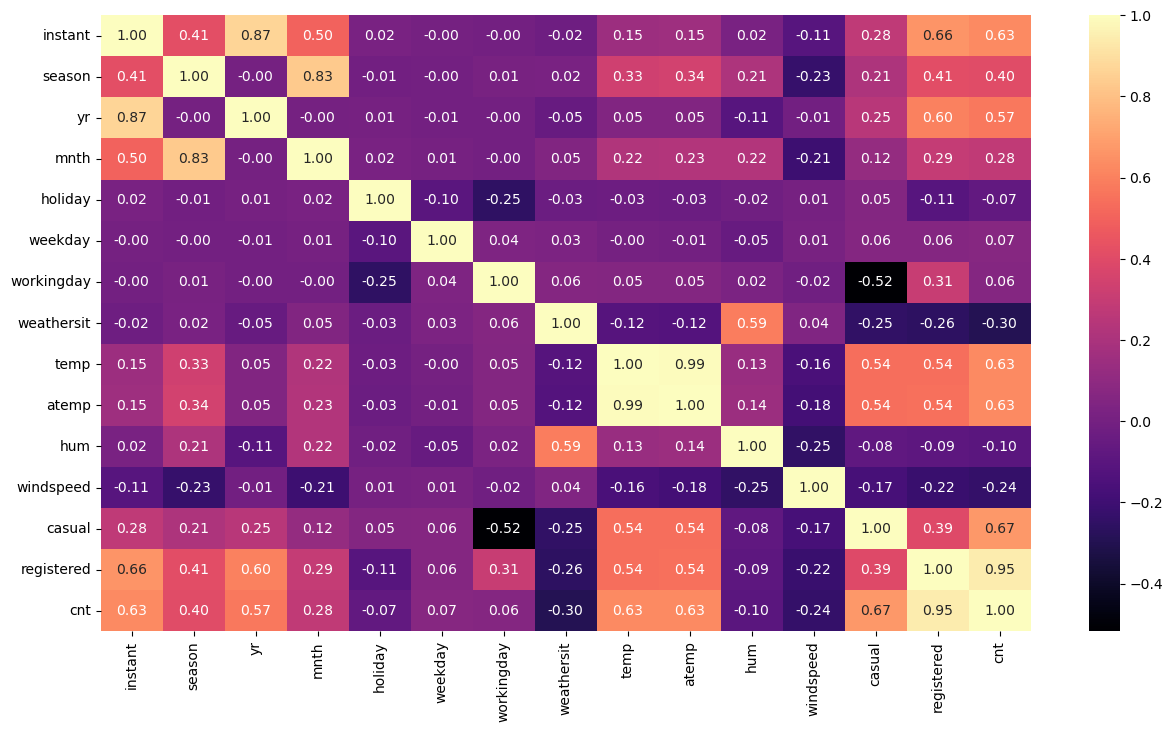

In [7]:

# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with dat  
# plotting correlation heatmap
plt.figure(figsize=(15,8))
dataplot=sb.heatmap(day.corr(),annot=True,fmt='.2f',cmap='magma')
  
# displaying heatmap
mp.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'weathersit'),
  Text(1, 0, 'windspeed'),
  Text(2, 0, 'hum'),
  Text(3, 0, 'holiday'),
  Text(4, 0, 'workingday'),
  Text(5, 0, 'weekday'),
  Text(6, 0, 'mnth'),
  Text(7, 0, 'season'),
  Text(8, 0, 'yr'),
  Text(9, 0, 'temp'),
  Text(10, 0, 'instant'),
  Text(11, 0, 'atemp'),
  Text(12, 0, 'casual'),
  Text(13, 0, 'registered'),
  Text(14, 0, 'cnt')])

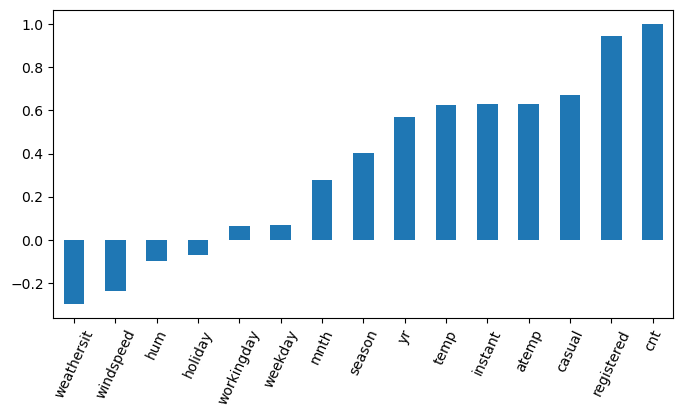

In [9]:
day.corrwith(day['cnt']).sort_values().plot(kind= 'bar', figsize=(8,4))
plt.xticks(rotation =65)

In [11]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()

my_day = day.drop(columns=['instant',	'dteday', 'atemp',		
	'casual','registered'])
my_day
my_day['temp']



0      14.110847
1      14.902598
2       8.050924
3       8.200000
4       9.305237
         ...    
725    10.420847
726    10.386653
727    10.386653
728    10.489153
729     8.849153
Name: temp, Length: 730, dtype: float64

In [12]:
X = my_day.drop(['cnt'], axis=1)
y = my_day['cnt']


In [13]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

IMPORTING MODULES

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

SPLITTING THE DATASET TO TRAIN AND TEST

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=49)

In [16]:
y_train

637    6889
383    3292
614    7504
19     1927
214    3574
       ... 
182    5119
501    7384
424    4990
685    5629
426    4066
Name: cnt, Length: 584, dtype: int64

In [17]:
y_test

24     1985
222    4792
246    4940
84     2496
545    5687
       ... 
220    4602
159    3915
85     1693
644    3510
534    6825
Name: cnt, Length: 146, dtype: int64

ASSIGNING THE OBJECT OF LINEAR REGRESSION

In [18]:
lm = LinearRegression()


FITTING THE MODEL

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

TRAINING THE MODEL

In [20]:
y_pred_train = lm.predict(X_train)

In [21]:
mse_train = mean_squared_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

In [22]:
print((mse_train))
print(r2_train)

738300.021567541
0.8023729929994874


TESTING THE MODEL

In [23]:
y_pred_test = lm.predict(X_test)

In [24]:
mse = mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

In [25]:
print((mse))
print(r2)

823111.0528738202
0.7817676358089276


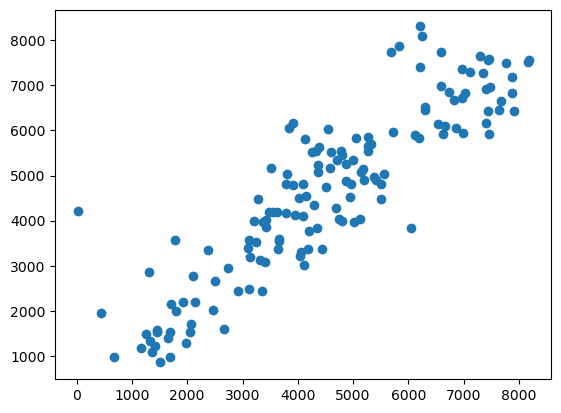

In [26]:
plt.scatter(y_test, y_pred_test)



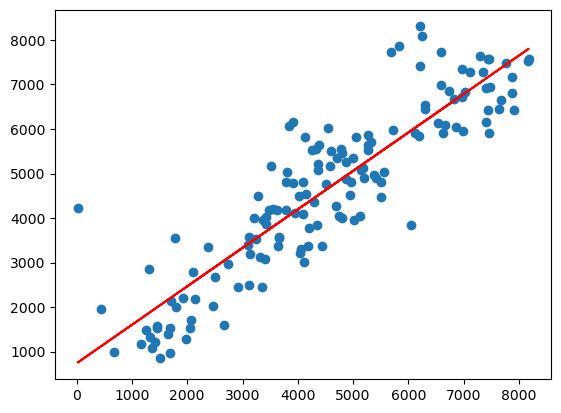

In [27]:
# Fit a line of best fit to the data
coefficients = np.polyfit(y_test, y_pred_test, 1)

# Create a line of best fit using the coefficients
best_fit_line = np.poly1d(coefficients)

# Plot the data and the line of best fit
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, best_fit_line(y_test), 'r')
